explore ways to use "weights" array in RMS and Correlation functions of CDAT

CDAT functions require that
1. weights is an MV2 type variable
2. weights array has "bounds" attribute on each dimensions
3. the dimension ids of the weights array match the dimensions of the fields that are being evaluated  

This can be achieved by 
1. turning on autobounds for a bit
2. making a copy of an array to be evaluated as the weight array, 
3. turning off autobounds
4. then replacing the id, and the data (with the chosen weights).




In [1]:
%matplotlib inline
import numpy as np
import cdms2
import cdutil
from cdms2 import MV2
from genutil import statistics

Allow anonymous logging usage to help improve CDAT(you can also set the environment variable CDAT_ANONYMOUS_LOG to yes or no)? [yes]/no:  no


In [2]:
jname1 = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
print "jname1", jname1

print "info before calling autobounds"
g1 = cdms2.open(jname1)
lat_bnds = g1("lat_bnds")
lev_bnds = 1000.*(g1("hyai")+g1("hybi"))
#print "lat_bnds",lat_bnds[0:4]
#print "lev_bnds bot",lev_bnds.sum(), lev_bnds[-4:]
#print "lev_bnds", lev_bnds[0:4]
mypwts = lev_bnds[1:]-lev_bnds[0:-1]
#print "mypwts", mypwts.shape, mypwts.sum(), mypwts
#print "mypwts", mypwts[0:4]

T1 =  g1("T",squeeze=1)
lat = T1.getAxis(1)
T1xav = cdutil.averager(T1,axis="x")

T2 =  g1("T",squeeze=1)
T2xav = cdutil.averager(T2,axis="x")

# now create a bounds using autobounds
orig_bounds = cdms2.getAutoBounds()
#print "autobounds", orig_bounds
cdms2.setAutoBounds(1)
#print "autobounds set"

lev = T2xav.getLevel()
#print "autobounds2", cdms2.getAutoBounds()


Tw2 = cdutil.area_weights(T2xav)
#print "Tw2.shape", Tw2.shape, Tw2[0:4,0], Tw2[0,0:4]
#print "Tw2.sum", Tw2.sum()

lat1 = T1xav.getAxis(1)
lbnd =lat1.getBounds()
#print "lbnd", lbnd.shape,lbnd[0:4,1], lbnd[0:4,0]
myywts = (np.sin(lbnd[:,1]*np.pi/180.)-np.sin(lbnd[:,0]*np.pi/180.))*0.5
#print "myywts", myywts[0:4]

#dlat = lbnd[:,1]-lbnd[:,0]
#print "dlat", dlat[0:4]
levs1 = T1xav.getAxis(0)
# looks like CDMS puts bounds halfway between dimension values,
# and then does something reasonable with the endpoints
bnd=levs1.getBounds()
#print "bnd.shape", bnd.shape
#print "cdms guess at bnd", bnd
#db = bnd[:,1]-bnd[:,0]
#print "db", db[0:4]

#print "db.shape", db.shape, db.sum()
#1./0.
levs1.setBounds(bnd)
# overwrite the default bounds with my version
levs1.setBounds(lev_bnds)
#print "lev_bnds 2", lev_bnds[0:4]
bnd=levs1.getBounds()
#print "bnd 2", bnd
db = bnd[:,1]-bnd[:,0]
#print "db 2", db[0:4]
#print "levs1 db",db[0:4]
cdms2.setAutoBounds(orig_bounds)
#print "autobounds unset"
#print "autobounds3", cdms2.getAutoBounds()

pert = 10.*np.random.random_sample((72, 192))
T1xav = T1xav + pert
levwts = levs1.getData()
levwts = db
#levwts[:] = 1.
#levwts = levwts/levwts.sum()
print "levwts.sum", levwts.dtype, levwts.sum()
print "levwts", levwts[0:4]

#print "help T1xav", help(T1xav)
tweights = T1xav.copy()
#print "tw info", tweights.info()

grid = T1.getGrid()
latwts, lonwts = grid.getWeights()
print "latwts", latwts[0:4]


#exweights = MV2.outerproduct(latwts, lonwts)
#print "exweights", exweights
#print "exweights.info", exweights.info()
#latwts[:] = 1.
#print "latwts.sum",latwts.dtype, latwts.sum()



jname1 /Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc
info before calling autobounds
levwts.sum float64 999.8999999968024
levwts [0.04765082 0.07035683 0.10388243 0.15338325]
latwts [1.69087141e-05 1.35262851e-04 2.70489109e-04 4.05642190e-04]


/Users/d3x345/miniconda2/lib/python2.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [35]:
# now create a bounds using autobounds
orig_bounds = cdms2.getAutoBounds()
print "autobounds", orig_bounds
cdms2.setAutoBounds(1)
print "autobounds set"


PS =  g1("PS",squeeze=1)
#print "PS.info()", PS.info()
PS.data[:] = 1.
#print "PSrev.info", PS.info()

Tw2 = cdutil.area_weights(PS)
print "Tw2.shape", Tw2.shape, Tw2[0:4,0], Tw2[0,0:4]
print "Tw2.sum", Tw2.sum()

print "PS.sum", PS.sum()
print "192*288", 192.*288.
PSGAV = cdutil.averager(PS,axis="xy")
print "PSGAV", PSGAV
PSGSUM = cdutil.averager(PS,axis="xy")
grid = PS.getGrid()
print "grid", grid
#print "grid.data", grid.data[:]
print "shape", grid.shape
latwts, lonwts = grid.getWeights()

#print "wts.data", shape(wts)

autobounds 1
autobounds set
Tw2.shape (192, 288) [5.87108128e-08 4.69662677e-07 9.39198294e-07 1.40847983e-06] [5.87108128e-08 5.87108128e-08 5.87108128e-08 5.87108128e-08]
Tw2.sum 1.0
PS.sum 55296.0
192*288 55296.0
PSGAV 1.0
grid Grid has Python id 0x11d872950.
Gridtype: generic
Grid shape: (192, 288)
Order: yx
shape (192, 288)


In [3]:
weights = MV2.outerproduct(levwts, latwts)
print "levwts[0],latwts[0],product", levwts[0], latwts[0], levwts[0]*latwts[0]
tweights.data[:] = weights.data[:]
tweights.id = 'tweights'
tweights.name = 'mass/area weights'
tweights.long_name = tweights.name
print "tweights.shape", tweights.shape, tweights[0:4,0], tweights[0,1:4]
#tweights = tweights/tweights.sum()
print "tweights.sum", tweights.sum()

# correlation works with no weights
result = statistics.correlation(T1xav, T2xav, axis='zy')
print "unweighted correlation", result
result = statistics.correlation(T1xav, T2xav, weights=tweights, axis='zy')
print "weighted correlation", result
result = statistics.rms(T1xav, T2xav, axis='zy')
print "unweighted rms", result
result = statistics.rms(T1xav, T2xav, weights=tweights, axis='zy')
print "weighted rms", result

#result = statistics.correlation(T1xav, T2xav, weights=(levwts,latwts), axis='zy')
#print "weighted correlation with 1D arrays, result", result

levwts[0],latwts[0],product 0.04765081971614585 1.690871407966643e-05 8.057140862420421e-07
tweights.shape (72, 192) [8.057140862420421e-07 1.18964344062853e-06 1.7565182736613226e-06
 2.593513602761546e-06] [6.445385727494766e-06 1.2889027753520937e-05 1.932918284834894e-05]
tweights.sum 999.8999999968024
unweighted correlation 0.9951347361004106
weighted correlation 0.9947111393867276
unweighted rms 5.783573137142542
weighted rms 5.804570234678501


/Users/d3x345/miniconda2/lib/python2.7/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


pjr.py complete
levwts  [ 0.04765082  0.07035683  0.10388243  0.15338325  0.22647163  0.33438722
  0.49372546  0.72898968  1.07635923  1.58925321  2.08797921  2.72993081
  3.46283489  4.25746709  5.06733242  5.82938464  6.46772492  7.07833868
  7.53149101  7.74523598  7.66600449  7.25641263  6.5014787   6.68039975
  7.2481363   7.86412429  8.53246339  9.25760488 10.04437513 10.89800188
 11.82416933 12.82905529 13.91934807 15.10229734 16.38577794 17.77833638
 19.28924273 20.92855591 22.7071889  24.63697472 26.73075721 29.00248949
 31.46729948 34.14157844 37.04312378 39.10239629 39.23951838 38.73122511
 37.30651753 36.04586955 34.3102834  32.10290437 29.43747764 26.3385396
 22.84128395 18.99086357 15.46183125 13.6703252  13.36002788 13.02841749
 12.67575804 12.30243635 11.90890591 11.49558154 11.06291181 10.61141626
 10.14179878  9.65482928  9.15113766  8.63140093  6.47184536  3.00712102]


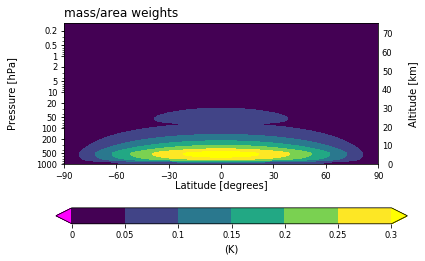

In [4]:
import pjr
pjr.plotZMf(tweights, tweights.getAxis(1), tweights.getAxis(0))
print "levwts ", levwts    

In [9]:
hyai = g1("hyai")
hyam = g1("hyam")
hybi = g1("hybi")
print "hyai", hyai
print "hybi", hybi
print "hybi 33 and 34", hybi[33], hybi[34]
print "lev_bnds", lev_bnds[34]*1000.
print "hyam", hyam

hyai [1.00000003e-04 1.47650823e-04 2.18007648e-04 3.21890076e-04
 4.75273331e-04 7.01744962e-04 1.03613218e-03 1.52985764e-03
 2.25884732e-03 3.33520655e-03 4.92445976e-03 7.01243897e-03
 9.74236978e-03 1.32052047e-02 1.74626718e-02 2.25300042e-02
 2.83593888e-02 3.48271138e-02 4.19054524e-02 4.94369434e-02
 5.71821794e-02 6.48481839e-02 7.21045965e-02 7.86060752e-02
 8.52864750e-02 9.25346113e-02 1.00398736e-01 1.08931199e-01
 1.18188804e-01 1.28233179e-01 1.39131181e-01 1.50955350e-01
 1.63784405e-01 1.77703754e-01 1.79385822e-01 1.75675927e-01
 1.71650738e-01 1.67283462e-01 1.62545029e-01 1.57403897e-01
 1.51825851e-01 1.45773757e-01 1.39207311e-01 1.32082804e-01
 1.24352823e-01 1.15965906e-01 1.07112739e-01 9.82285217e-02
 8.94593912e-02 8.10128312e-02 7.28516968e-02 6.50835216e-02
 5.78151181e-02 5.11501816e-02 4.51868752e-02 4.00153816e-02
 3.57156610e-02 3.22149484e-02 2.91198596e-02 2.60950270e-02
 2.31452699e-02 2.02753566e-02 1.74899619e-02 1.47936633e-02
 1.21909510e-02 9.6